# Text Preprocessing 

In [38]:
# imports
import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [39]:
# Reading in data
df = pd.read_csv('./data/all_post.csv',index_col=0 )

In [40]:
# Examining data
df.head()

,title,subreddit,selftext,permalink,author,created_utc,media_only,all_text
0,How can AI combine with Automation for the use...,0,NaN,/r/ArtificialInteligence/comments/j3fz97/how_c...,Impossible_Success_9,1601582198,False,how can ai combine with automation for the use...
1,[R] EvolGAN Boosts Image Quality for Small or ...,0,GAN models however require massive amounts of ...,/r/ArtificialInteligence/comments/j3elpz/r_evo...,Yuqing7,1601577926,False,[r] evolgan boosts image quality for small or ...
2,Aren't you excited to try this project ??,0,# Code:- [https://aihubprojects.com/ai-project...,/r/ArtificialInteligence/comments/j3dzpn/arent...,aihubprojects,1601576018,False,aren't you excited to try this project ??# cod...
3,Things to Consider for Implementing Voice-enab...,0,NaN,/r/ArtificialInteligence/comments/j3d6k3/thing...,analyticsinsight,1601573537,False,things to consider for implementing voice-enab...
4,Development in General Adversarial Networks (G...,0,NaN,/r/ArtificialInteligence/comments/j3ccg2/devel...,m1900kang2,1601571077,False,development in general adversarial networks (g...


In [41]:
# Dropping NA's from the data frame
df = df.dropna(subset=['all_text'])

In [42]:
df['subreddit'].value_counts()

0    9998
1    9743
Name: subreddit, dtype: int64

## Creating and Testing Preprocessing Function

In [43]:
test = 'I like machine learning. AI is the coolest. When are machines going to take over the world?'

In [44]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [45]:
# Lemmetization function
def lem_preprocess(text):
    t = word_tokenize(text.lower())
    l = [lemmatizer.lemmatize(word) for word in t]
    return ' '.join(l)

In [46]:
# Lemmetization test
lem_preprocess(test)

'i like machine learning . ai is the coolest . when are machine going to take over the world ?'

In [47]:
# Stem function
def stem_preprocess(text):
    t = word_tokenize(text.lower())
    p = [stemmer.stem(word) for word in t]
    return ' '.join(p)

In [48]:
# Stem function test
stem_preprocess(test)

'i like machin learn . ai is the coolest . when are machin go to take over the world ?'

In [49]:
# Creating stemmed and lemmetized all_text columns

df['stem_all_text'] = df['all_text'].apply(stem_preprocess)
df['lem_all_text'] = df['all_text'].apply(lem_preprocess)

In [50]:
# Examining the data after changes
df.head()

,title,subreddit,selftext,permalink,author,created_utc,media_only,all_text,stem_all_text,lem_all_text
0,How can AI combine with Automation for the use...,0,NaN,/r/ArtificialInteligence/comments/j3fz97/how_c...,Impossible_Success_9,1601582198,False,how can ai combine with automation for the use...,how can ai combin with autom for the use of th...,how can ai combine with automation for the use...
1,[R] EvolGAN Boosts Image Quality for Small or ...,0,GAN models however require massive amounts of ...,/r/ArtificialInteligence/comments/j3elpz/r_evo...,Yuqing7,1601577926,False,[r] evolgan boosts image quality for small or ...,[ r ] evolgan boost imag qualiti for small or ...,[ r ] evolgan boost image quality for small or...
2,Aren't you excited to try this project ??,0,# Code:- [https://aihubprojects.com/ai-project...,/r/ArtificialInteligence/comments/j3dzpn/arent...,aihubprojects,1601576018,False,aren't you excited to try this project ??# cod...,are n't you excit to tri thi project ? ? # cod...,are n't you excited to try this project ? ? # ...
3,Things to Consider for Implementing Voice-enab...,0,NaN,/r/ArtificialInteligence/comments/j3d6k3/thing...,analyticsinsight,1601573537,False,things to consider for implementing voice-enab...,thing to consid for implement voice-en ai,thing to consider for implementing voice-enabl...
4,Development in General Adversarial Networks (G...,0,NaN,/r/ArtificialInteligence/comments/j3ccg2/devel...,m1900kang2,1601571077,False,development in general adversarial networks (g...,develop in gener adversari network ( gan ) ha ...,development in general adversarial network ( g...


## Investigating Potential Stop Words

In [51]:
# Creating ml and ai data frames
ml = df[df['subreddit'] == 1]
ai = df[df['subreddit'] == 0]

In [14]:
# After some EDA, I found these words to be commonly used in both of the subreddtis.
my_stop_words = text.ENGLISH_STOP_WORDS.union(["removed", 'data', 'http', 'machine', 'learning',
                                               'ai', 'artificial', 'intelligence', 'removed', 'com'])

In [15]:
# Instantiating vectorizer using my_stop_words from above
tfd = TfidfVectorizer(stop_words=my_stop_words)
tfd2 = TfidfVectorizer(stop_words=my_stop_words)

In [16]:
# Fitting and transforming my vectorizers
ml_vect = tfd.fit_transform(ml['lem_all_text'])
ai_vect = tfd2.fit_transform(ai['lem_all_text'])

#### Creating Vectorized Machine Learning Dataframe to view most common words

In [17]:
# Vectorized ML data frame
ml_df = pd.DataFrame(ml_vect.toarray(), 
            columns = tfd.get_feature_names())

In [18]:
# Counting the words
top_words = {}
for i in ml_df.columns:
    top_words[i] =  sum(ml_df[i])   

In [19]:
# Dataframe with counts
ml_most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True), columns=['Word', 'Count'])
ml_top_15 = ml_most_freq.head(15)
#ml_top_15.set_index(0, inplace=True)

In [20]:
ml_top_15

,Word,Count
0,model,205.433608
1,ml,173.521795
2,using,129.811651
3,project,125.389416
4,paper,119.559208
5,image,118.839068
6,deep,116.505062
7,network,115.328174
8,amp,114.216934
9,help,108.087684


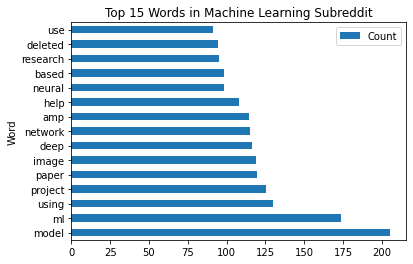

In [21]:
ml_top_15.set_index('Word').plot(kind='barh')
plt.title('Top 15 Words in Machine Learning Subreddit');
plt.savefig('./assets/ml_top15.png')

#### Creating Vectorized AI Dataframe to view most common words

In [22]:
# Vectorized AI data frame
ai_df = pd.DataFrame(ai_vect.toarray(), 
            columns = tfd2.get_feature_names())

In [23]:
# Counting the words
top_words = {}
for i in ai_df.columns:
    top_words[i] =  sum(ai_df[i]) 

In [24]:
# Dataframe with counts
ai_most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True), columns=['Word', 'Count'])
ai_top_15 = ai_most_freq.head(15)

In [25]:
ai_top_15

,Word,Count
0,amp,143.413931
1,onpassive,128.491029
2,business,120.888356
3,2020,115.722501
4,future,112.307560
5,technology,100.752198
6,new,100.509976
7,using,97.742609
8,industry,97.527788
9,human,96.419451


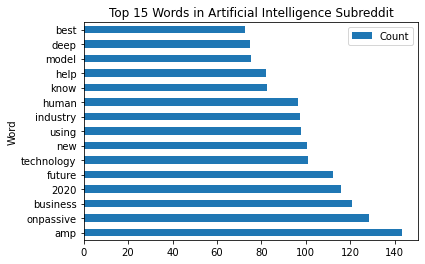

In [26]:
ai_top_15.set_index('Word').plot(kind='barh');
plt.title('Top 15 Words in Artificial Intelligence Subreddit')
plt.savefig('./assets/ai_top15');

In [21]:
# Saving preprocessing work on data
df.to_csv('./data/processed_posts.csv')